## Desafio Guiado S6

* sbp: Presión Sanguínea Sistólica.
* tobacco: Promedio tabaco consumido por día.
* ldl: Lipoproteína de baja densidad.
* adiposity: Adiposidad.
* famhist: Antecedentes familiares de enfermedades cardiácas. (Binaria)
* types: Personalidad tipo A
* obesity: Obesidad.
* alcohol: Consumo actual de alcohol.
* age: edad.
* chd: Enfermedad coronaria. (dummy)

### Req 1 Preparar ambiente de trabajo

* Cargue las librerías básicas para importación y manipulación de datos (numpy, pandas), gráficos (matplotlib y seaborn) y de modelación econométrica (statsmodels).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
plt.style.use('seaborn') # Gráficos estilo seaborn
# plt.rcParams["figure.figsize"] = (6, 3) # Tamaño gráficos
# plt.rcParams["figure.dpi"] = 200 # resolución gráficos

* Importe el archivo southafricanheart.csv que se encuentra dentro del material de apoyo.

In [2]:
df = pd.read_csv('southafricanheart.csv')

* Realice una descripción del set importado mostrando
    - lista con los nombres de variables importadas
    - un análisis descriptivo mediante .describe()
    - Distribución de categorías para las variables famhist y chd

In [3]:
df.columns

Index(['Unnamed: 0', 'sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea',
       'obesity', 'alcohol', 'age', 'chd'],
      dtype='object')

In [4]:
df = df.drop(columns='Unnamed: 0', axis=1)

In [5]:
df.columns

Index(['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity',
       'alcohol', 'age', 'chd'],
      dtype='object')

In [6]:
df.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [7]:
df['famhist'].unique()

array(['Present', 'Absent'], dtype=object)

In [8]:
df['chd'].unique()

array([1, 0])

In [9]:
var_numericas = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity',
       'alcohol', 'age']
var_categoricas = ['famhist','chd']

In [10]:
df.loc[:,var_numericas].describe()

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000


In [11]:
for columna in var_categoricas:
    print(f'''
{columna}
{round(df[columna].value_counts('%')*100,2)} ''')


famhist
Absent     58.44
Present    41.56
Name: famhist, dtype: float64 

chd
0    65.37
1    34.63
Name: chd, dtype: float64 


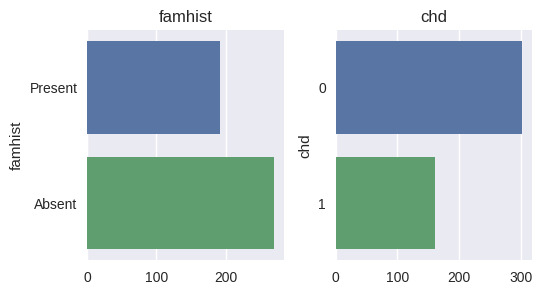

In [12]:
for n, i in enumerate(var_categoricas):
    plt.subplot(2, 3, n+1)
    sns.countplot(y=df[i])
    plt.title(i)
    plt.xlabel("")
    plt.tight_layout()



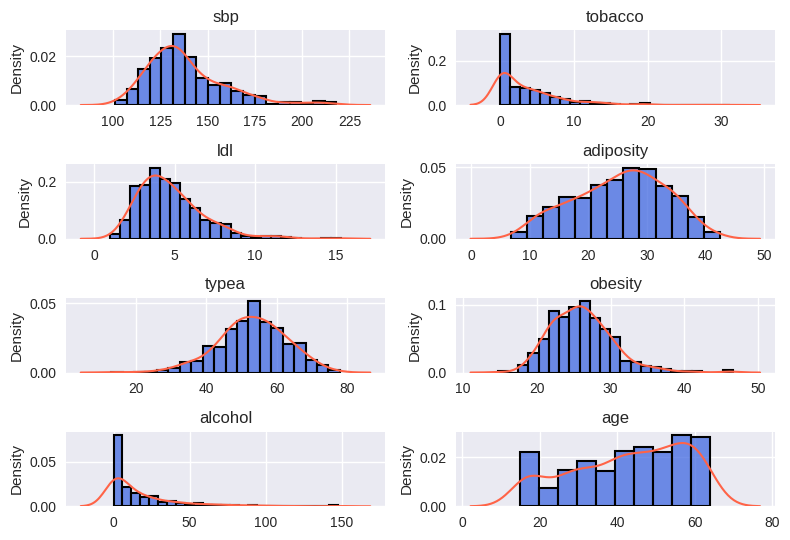

In [13]:
for n, i in enumerate(var_numericas):
    plt.subplot(4, 2, n+1)
    sns.histplot(df[i], stat='density', color='royalblue', lw=1.5)
    sns.kdeplot(df[i], color='tomato', lw=1.5)
    plt.title(i)
    plt.xlabel("")
    plt.tight_layout()

### Req 2 

![Descripción de la imagen](r2.jpg)

1. Recodifique famhist a dummy, asignando 1 a la categoría minoritaria.

In [14]:
rec_categoricas = pd.get_dummies(df['famhist'],
prefix='famhist' ,drop_first=True)

In [15]:
rec_categoricas.value_counts()

famhist_Present
0                  270
1                  192
dtype: int64

In [16]:
df_bin = pd.concat([df, rec_categoricas], axis=1).copy()
df_bin.sample()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,famhist_Present
70,118,0.0,3.67,12.13,Absent,51,19.15,0.6,15,0,0


In [17]:
df_bin.shape

(462, 11)

* 2. Utilice smf.logit para estimar el modelo.

In [18]:
m1_logit = smf.logit('chd ~ famhist_Present', df_bin).fit()
m1_logit.summary()

Optimization terminated successfully.
         Current function value: 0.608111
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    chd   No. Observations:                  462
Model:                          Logit   Df Residuals:                      460
Method:                           MLE   Df Model:                            1
Date:                Sun, 22 Jan 2023   Pseudo R-squ.:                 0.05740
Time:                        17:15:22   Log-Likelihood:                -280.95
converged:                       True   LL-Null:                       -298.05
Covariance Type:            nonrobust   LLR p-value:                 4.937e-09
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -1.1690      0.143     -8.169      0.000      -1.449      -0.889
famhist_Present     1.1690      0.203      5.751      0.000       0.771       1.567
===================================================================================
"""

In [19]:
def inverse_logit(x):
    return 1 / (1+np.exp(-x))

In [20]:
m1_logit.params

Intercept         -1.168993
famhist_Present    1.168993
dtype: float64

4. Con el modelo estimado, responda lo siguiente:
    * ¿Cuál es la probabilidad de un individuo con antecedentes familiares de tener una enfermedad coronaria?

In [21]:
m1log_intercept = m1_logit.params['Intercept']
m1log_famhist = m1_logit.params['famhist_Present']


In [22]:
p_famhist = inverse_logit(m1log_intercept+m1log_famhist)*100
p_famhist

50.0

* ¿Cuál es la probabilidad de un individuo sin antecedentes familiares de tener una enfermedad coronaria?

In [23]:
p_sin_famhist = inverse_logit(m1log_intercept)*100
p_sin_famhist

23.703703703703688

* ¿Cuál es la diferencia en la probabilidad entre un individuo con antecedentes y otro sin antecedentes?

In [24]:
p_famhist-p_sin_famhist

26.296296296296312

* Replique el modelo con smf.ols y comente las similitudes entre los coeficientes estimados. Tip: Utilice β/4

In [25]:
m1_ols = smf.ols('chd ~ famhist_Present', df_bin).fit()

In [26]:
m1_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    chd   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     36.86
Date:                Sun, 22 Jan 2023   Prob (F-statistic):           2.66e-09
Time:                        17:15:23   Log-Likelihood:                -294.59
No. Observations:                 462   AIC:                             593.2
Df Residuals:                     460   BIC:                             601.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2370      0.028      8.489      0.000       0.182       0.292
famhist_Present     0.2630      0.043      6.071      0.000       0.178       0.348
==============================================================================
Omnibus:                      768.898   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.778
Skew:                           0.579   Prob(JB):                     1.72e-13
Kurtosis:                       1.692   Cond. No.                         2.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
m1log_famhist/4

0.29224827135747744

In [28]:
(m1log_famhist/4 )- m1_ols.params['famhist_Present']

0.029285308394514598

In [29]:
m1log_intercept/4

-0.2922482713574775

Se observa que el modelo a aplicar nuestra funcion inverse_logit, nos entrega correctamente los valores, sin embargo al intentar aproximar los valores mediante B/4 nos ubicamos al menos un 3% mas alto que el modelo ols.

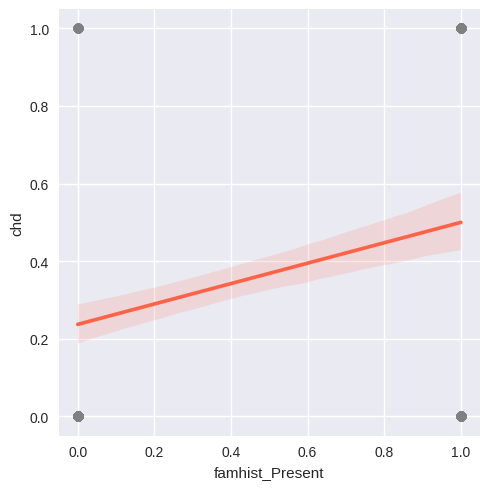

In [30]:
sns.lmplot(x='famhist_Present',y='chd', data=df_bin,
line_kws={'color':'tomato'},
scatter_kws={'color': 'grey', 'alpha': .5})

### Req 3: Estimacion completa

Implemente un modelo con la siguiente forma:

![Descripción de la imagen](r3.png)

<AxesSubplot:>

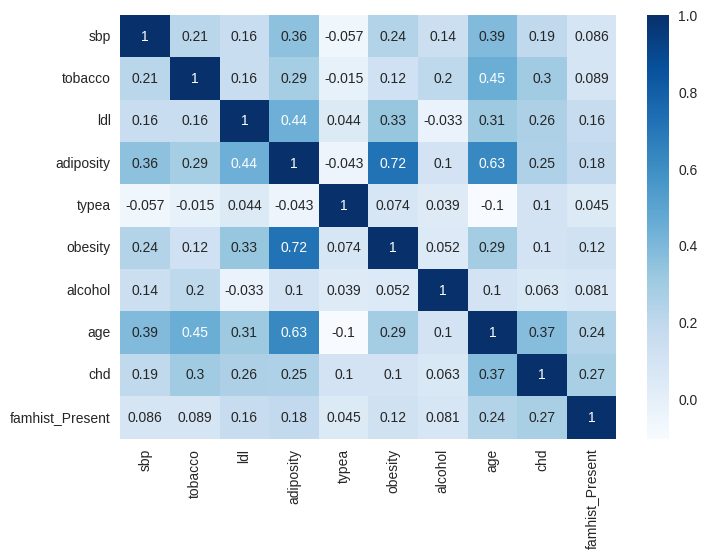

In [31]:
sns.heatmap(df_bin.corr(), cmap='Blues', annot=True)

In [32]:
var_reg = var_numericas + ['famhist_Present']
var_reg


['sbp',
 'tobacco',
 'ldl',
 'adiposity',
 'typea',
 'obesity',
 'alcohol',
 'age',
 'famhist_Present']

In [33]:
var_reg_join = '+'.join(var_reg)
var_reg_join

'sbp+tobacco+ldl+adiposity+typea+obesity+alcohol+age+famhist_Present'

In [34]:
m2_log = smf.logit(f'chd ~ {var_reg_join}', df_bin).fit()

Optimization terminated successfully.
         Current function value: 0.510974
         Iterations 6


In [35]:
m2_log.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.208     
Dependent Variable: chd              AIC:              492.1400  
Date:               2023-01-22 17:15 BIC:              533.4957  
No. Observations:   462              Log-Likelihood:   -236.07   
Df Model:           9                LL-Null:          -298.05   
Df Residuals:       452              LLR p-value:      2.0548e-22
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -6.1507   1.3083 -4.7015 0.0000 -8.7149 -3.5866
sbp                0.0065   0.0057  1.1350 0.2564 -0.0047  0.0177
tobacco            0.0794   0.0266  2.9838 0.0028  0.0272  0.1315
ldl                0.1739   0.0597  2.9152 0.0036  0.0570  0.2909
adiposity          0.0186   0.0293  0.6346 0.5257 -0.0388  0.0760
typea              0.0396   0.0123  3.2138 0.0013  0.0154  0.0637
obesity           -0.0629   0.0442 -1.4218 0.1551 -0.1496  0.0238
alcohol            0.0001   0.0045  0.0271 0.9784 -0.0087  0.0089
age                0.0452   0.0121  3.7285 0.0002  0.0215  0.0690
famhist_Present    0.9254   0.2279  4.0605 0.0000  0.4787  1.3720
=================================================================

"""

In [36]:
var_adj = m2_log.summary2().tables[1]['P>|z|']
var_adj

Intercept          0.000003
sbp                0.256374
tobacco            0.002847
ldl                0.003555
adiposity          0.525700
typea              0.001310
obesity            0.155095
alcohol            0.978350
age                0.000193
famhist_Present    0.000049
Name: P>|z|, dtype: float64

In [37]:
var_adj_join = '+'.join(var_adj[var_adj < 0.05].index[1:])
var_adj_join

'tobacco+ldl+typea+age+famhist_Present'

In [38]:
m2_log_adj = smf.logit(f'chd ~ {var_adj_join}', df_bin).fit()

Optimization terminated successfully.
         Current function value: 0.514811
         Iterations 6


In [39]:
m2_log_adj.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.202     
Dependent Variable: chd              AIC:              487.6856  
Date:               2023-01-22 17:15 BIC:              512.4990  
No. Observations:   462              Log-Likelihood:   -237.84   
Df Model:           5                LL-Null:          -298.05   
Df Residuals:       456              LLR p-value:      2.5537e-24
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept         -6.4464   0.9209 -7.0004 0.0000 -8.2513 -4.6416
tobacco            0.0804   0.0259  3.1057 0.0019  0.0297  0.1311
ldl                0.1620   0.0550  2.9470 0.0032  0.0543  0.2697
typea              0.0371   0.0122  3.0505 0.0023  0.0133  0.0610
age                0.0505   0.0102  4.9442 0.0000  0.0305  0.0705
famhist_Present    0.9082   0.2258  4.0228 0.0001  0.4657  1.3507
=================================================================

"""

In [40]:
def validar_modelos(modelo):    
    fit = pd.DataFrame({'Statistics': modelo.summary2().tables[0][2][0:],
    'Value': modelo.summary2().tables[0][3][0:]})
    print(fit)

In [41]:
validar_modelos(m2_log)

          Statistics       Value
0  Pseudo R-squared:       0.208
1               AIC:    492.1400
2               BIC:    533.4957
3    Log-Likelihood:     -236.07
4           LL-Null:     -298.05
5       LLR p-value:  2.0548e-22
6             Scale:      1.0000
7                               


In [42]:
validar_modelos(m2_log_adj)

          Statistics       Value
0  Pseudo R-squared:       0.202
1               AIC:    487.6856
2               BIC:    512.4990
3    Log-Likelihood:     -237.84
4           LL-Null:     -298.05
5       LLR p-value:  2.5537e-24
6             Scale:      1.0000
7                               


* En ambos modelos nos encontramos con un p-value menor a 0.05 lo que nos indica un modelo significativo al 95%.
* LL-Null, Log-Likelihood y Pseudo R-squared son similares en ambos modelos, sin embargo tenemos un BIC menor en el segundo modelo, lo que nos confirma que el segundo modelo es mejor que el primero al estar utilizando menos variables y mantenemos nuestro poder predictivo.

* Reporte de forma sucinta el efecto de las variables en el log-odds de tener una enfermedad coronaria.

In [43]:
list(m2_log_adj.params.index)

['Intercept', 'tobacco', 'ldl', 'typea', 'age', 'famhist_Present']

In [44]:
def reporte_prob(modelo):
    tmp_index = list(modelo.params.index)
    for n, i in enumerate(tmp_index):
        prob = inverse_logit(modelo.params[n])
        print(f'{i}: {np.round(prob,4)*100}')
reporte_prob(m2_log_adj)

Intercept: 0.16
tobacco: 52.01
ldl: 54.04
typea: 50.93
age: 51.25999999999999
famhist_Present: 71.26


La variable que reporta una mayor probabilidad de afectar en desarrollar una enfermedad cardiaca es el historial familiar con un 71%, luego las demas variables comparten el nivel al rededor de un 50%.

### Req 4: Estimacion de perfiles.

A partir del modelo depurado, genere las estimaciones en log-odds y posteriormente
transfórmelas a probabilidades con inverse_logit. Los perfiles a estimar son los
siguientes:

* La probabilidad de tener una enfermedad coronaria para un individuo con características similares a la muestra.

intercepto + var * media var

In [45]:
def reporte_prob_var(modelo, df,funcion='mean',variable_interes='', funcion_interes='mean'):
    '''
    modelo[statsmodels.discrete.discrete_model.BinaryResultsWrapper]
        : modelo contenedor de la regresion logaritmica
    df[pd.series]: data frame
    funcion[Str]: Min, Max o Mean
    variable_interes[Str]: nombre de la columna a estudiar con funcion_interes
    funcion_interes[Str]: funcion Min, Max o Mean para estudiar variable_interes

    '''
    tmp_index = list(modelo.params.index)
    tmp_index.remove('Intercept')
    tmp_interc = modelo.params['Intercept']
    n=1
    y_estimado = tmp_interc
    if variable_interes == '':
        for i in tmp_index:
            tmp_func = eval(f'df[i].{funcion}()')
            y_estimado = y_estimado + (modelo.params[n]*tmp_func)
            n+=1
    else:
        for i in tmp_index:
            if i == variable_interes:
                tmp_func = eval(f'df[i].{funcion_interes}()')
                y_estimado = y_estimado + (modelo.params[n]*tmp_func)
                n+=1
            else: 
                tmp_func = eval(f'df[i].{funcion}()')
                y_estimado = y_estimado + (modelo.params[n]*tmp_func)
                n+=1
    prob = inverse_logit(y_estimado)
    print(f'''
    Proba: {np.round(prob*100,2)}%''')
reporte_prob_var(m2_log_adj, df_bin)


    Proba: 29.37%


* La probabilidad de tener una enfermedad coronaria para un individuo con altos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.

In [46]:
reporte_prob_var(m2_log_adj, df_bin, variable_interes='ldl',funcion_interes='max')


    Proba: 69.8%


* La probabilidad de tener una enfermedad coronaria para un individuo con bajos niveles de lipoproteína de baja densidad, manteniendo todas las demás características constantes.

In [47]:
reporte_prob_var(m2_log_adj, df_bin, variable_interes='ldl',funcion_interes='min')


    Proba: 18.44%
